**EXAMPLE 1**

The scenario is described as: there are two passive infrared sensors, located at $[3.5, 0]^T$ and $[-3.5, 0]^T$. The measurement of each sensor is the angle of the target relative to the sensor. The truth location of a stationary target, shown as red square, is $[4, 4]^T$.

The overall measurement equation is

$$
\mathbf{z} = \begin{bmatrix} z_1 \\ z_2 \end{bmatrix}, \quad z_i = \arctan\left(\frac{y_t - y_i}{x_t - x_i}\right) + v_i
$$

in which $[x_t, y_t]^T$ is the coordinate of the target, $[y_i, x_i]^T$ is the coordinate of sensor $i$, and $v_i$ is the (Gaussian) measurement noise for sensor $i$. The prior distribution is Gaussian with mean and covariance matrix, respectively,

$$
x_{\text{prior}} = \begin{bmatrix} 3.0 \\ 5.0 \end{bmatrix}, \quad P_{\text{prior}} = \begin{bmatrix} 1000.0 & 0 \\ 0 & 2.0 \end{bmatrix}.
$$

The prior knowledge about the location of the target is quite off. The measurement noise $[v_1, v_2]^T$ is Gaussian with zero mean and covariance matrix $R = 0.04I_{2 \times 2}$. We take a measurement as a sample automatically generated in Matlab $\mathbf{z} = [0.4754, 1.1868]^T$. Other parameters are $\mu = 0.2$ and $Q = \text{diag}(4.0, 0.4)$. 

For this example, the objective function $J$ for the straight line log-homotopy is 4.0, while the objective function corresponding to the optimal $\beta^*(\lambda)$ is 3.4. 

Figure task: shows the comparison of the optimal $\beta^*(\lambda)$ with the straight line log-homotopy $\beta(\lambda) = \lambda$. Fig. 2(d) shows reduction of the stiffness of the Jacobian matrix $F$ for the flow equation. Note that $R_{\text{stiff}}$ is plotted in log-scale to aid visualization. The reduction in the stiffness ratio is modest for this example. (Shows the Comparison of the optimal $\beta^*(\lambda)$ with the straight line $\beta(\lambda) = \lambda$ for Example 1.) 
Subfigures to be plotted:
- $\beta(\lambda)$ 
- $e = \beta^*(\lambda) - (\lambda)$
- $u^*(\lambda)$
- $R_{\text{stiff}}$.



However, the impact on reducing estimation errors is significant, as given in **Table I**.
Then for Table:
We performed 20 Monte Carlo (MC) runs to evaluate filtering accuracy for both the baseline homotopy and the optimal homotopy. For each run, the number of particles is 50. Same sequences of Brownian motion samples are used in the numerical evaluation of the flow for both the straight line and the optimal $\beta^*(\lambda)$, which has been known as the scheme of common random numbers (CRN) in MC methods. CRN allows the evaluation to be focused on the comparison of numerical accuracy by taking out the underlying randomness. The estimation accuracy is measured by the root-mean-square error (RMSE) of the estimate and the trace of error covariance matrix $\mathrm{tr}(P)$. The results are given in **Table I** for each MC run and overall average. 
Columns of the Table:
- MC index
- RMSE_{$\beta_l$}
- RMSE_{$\beta^*$}
- tr($P_{\beta_l}$)
- tr($P_{\beta^*}$)

And the last row showing each average.



The optimal homotopy indeed improves filtering accuracy in terms of reduced RMSE and covariance matrix. 
Figure task: compares the computing time of filtering with finding the optimal $\beta^*(\lambda)$ with that of setting $\beta(\lambda) = \lambda$. To plot the computing time in seconds against the MC run index. for optimal $\beta^*(\lambda)$, $\beta(\lambda)=\lambda$, average for optimal $\beta^*(\lambda)$ and average for $\beta(\lambda)=\lambda$.



In [ ]:
import numpy as np
from dataclasses import dataclass

# ============================================================
# Example 1 configuration (scenario + basic model functions)
# ============================================================

@dataclass
class Example1Config:
    """Configuration for Example 1 in 'Stiffness Mitigation in Stochastic Particle Flow Filters'.

    State: x = [x_t, y_t]^T  (target position)
    Sensors: two bearing-only sensors at (3.5, 0) and (-3.5, 0)
    Measurement model (per sensor i):
        z_i = atan( (y_t - y_i) / (x_t - x_i) ) + v_i,
      with v_i ~ N(0, 0.04)

    Paper parameters:
      x_true   = [4, 4]^T
      x_prior  = [3, 5]^T
      P_prior  = diag(1000, 2)
      R        = 0.04 * I_2
      z_sample = [0.4754, 1.1868]^T
      mu       = 0.2
      Q        = diag(4.0, 0.4)

    Attributes:
        x_true (np.ndarray): True state (for generating data / MC evaluation).
        sensors (np.ndarray): Sensor positions of shape (2, 2), rows are [x_i, y_i].
        x_prior (np.ndarray): Prior mean.
        P_prior (np.ndarray): Prior covariance.
        R (np.ndarray): Measurement noise covariance (2x2).
        z (np.ndarray): Fixed measurement used in the paper.
        mu (float): Homotopy weight for SPF.
        Q (np.ndarray): Diffusion for SPF.
    """
    # True state (for generating data / MC evaluation)
    x_true: np.ndarray

    # Sensor positions: shape (2, 2), rows are [x_i, y_i]
    sensors: np.ndarray

    # Prior mean and covariance
    x_prior: np.ndarray
    P_prior: np.ndarray

    # Measurement noise covariance (2x2)
    R: np.ndarray

    # Fixed measurement used in the paper
    z: np.ndarray

    # Homotopy weight and diffusion for SPF
    mu: float
    Q: np.ndarray


def create_example1_config() -> Example1Config:
    """Create the Example 1 config exactly as specified in the paper.

    Returns:
        Example1Config: Configuration object with all paper parameters.
    """
    # True target position
    x_true = np.array([4.0, 4.0])

    # Two sensors at (3.5, 0) and (-3.5, 0)
    # We use [x, y] ordering consistently.
    sensors = np.array([
        [3.5, 0.0],
        [-3.5, 0.0]
    ], dtype=float)

    # Prior N(x_prior, P_prior)
    x_prior = np.array([3.0, 5.0], dtype=float)
    P_prior = np.diag([1000.0, 2.0]).astype(float)

    # Measurement noise R = 0.04 I_2
    R = 0.04 * np.eye(2, dtype=float)

    # The specific measurement sample used in the paper
    # z = [0.4754, 1.1868]^T
    z = np.array([0.4754, 1.1868], dtype=float)

    # Stiffness-mitigation weight and diffusion for SPF
    mu = 0.2
    Q = np.diag([4.0, 0.4]).astype(float)

    return Example1Config(
        x_true=x_true,
        sensors=sensors,
        x_prior=x_prior,
        P_prior=P_prior,
        R=R,
        z=z,
        mu=mu,
        Q=Q,
    )


# ============================================================
# Measurement model: bearings from sensors to target
# ============================================================

def bearing_measurement(x: np.ndarray, sensors: np.ndarray) -> np.ndarray:
    """Bearing-only measurement function h(x) for all sensors.

    Args:
        x (np.ndarray): State vector [x_t, y_t] of shape (2,).
        sensors (np.ndarray): Array of sensor positions of shape (n_sensors, 2),
            each row [x_i, y_i].

    Returns:
        np.ndarray: Predicted bearing measurements of shape (n_sensors,),
            z_i = atan2( y_t - y_i, x_t - x_i ).
    """
    x = np.asarray(x).reshape(2,)
    sensors = np.asarray(sensors)
    dx = x[0] - sensors[:, 0]
    dy = x[1] - sensors[:, 1]
    return np.arctan2(dy, dx)


def bearing_jacobian(x: np.ndarray, sensors: np.ndarray) -> np.ndarray:
    """Jacobian of the bearing measurement w.r.t. state x = [x_t, y_t].

    For each sensor i:
        θ_i = atan2(dy_i, dx_i)
        ∂θ_i/∂x_t = - dy_i / (dx_i^2 + dy_i^2)
        ∂θ_i/∂y_t =   dx_i / (dx_i^2 + dy_i^2)

    Args:
        x (np.ndarray): State vector [x_t, y_t] of shape (2,).
        sensors (np.ndarray): Array of sensor positions of shape (n_sensors, 2).

    Returns:
        np.ndarray: Measurement Jacobian of shape (n_sensors, 2).
    """
    x = np.asarray(x).reshape(2,)
    sensors = np.asarray(sensors)
    dx = x[0] - sensors[:, 0]
    dy = x[1] - sensors[:, 1]
    r2 = dx**2 + dy**2

    # Avoid division by zero if a particle sits exactly on top of a sensor
    eps = 1e-12
    r2 = np.maximum(r2, eps)

    H = np.empty((sensors.shape[0], 2), dtype=float)
    H[:, 0] = -dy / r2   # dθ/dx_t
    H[:, 1] =  dx / r2   # dθ/dy_t
    return H


# ============================================================
# Log-likelihood, gradient, and Gauss–Newton Hessian approx
# ============================================================

def log_likelihood(x: np.ndarray, z: np.ndarray,
                   sensors: np.ndarray, R: np.ndarray) -> float:
    """Compute log p(z | x) under Gaussian noise: z | x ~ N( h(x), R ).

    log p(z|x) = -0.5 * (z - h(x))^T R^{-1} (z - h(x)) + const

    Args:
        x (np.ndarray): State vector.
        z (np.ndarray): Observation vector.
        sensors (np.ndarray): Sensor positions.
        R (np.ndarray): Measurement noise covariance.

    Returns:
        float: Log-likelihood value.
    """
    z = np.asarray(z).reshape(-1)
    h = bearing_measurement(x, sensors)
    e = z - h
    R_inv = np.linalg.inv(R)
    return -0.5 * float(e.T @ (R_inv @ e))


def grad_log_likelihood(x: np.ndarray, z: np.ndarray,
                        sensors: np.ndarray, R: np.ndarray) -> np.ndarray:
    """Gradient of log-likelihood w.r.t. state x.

    Using:
        log p(z|x) = -0.5 e^T R^{-1} e,  e = z - h(x)
        ∇_x log p(z|x) = (∂h/∂x)^T R^{-1} (z - h(x))
                       = H(x)^T R^{-1} e

    Args:
        x (np.ndarray): State vector.
        z (np.ndarray): Observation vector.
        sensors (np.ndarray): Sensor positions.
        R (np.ndarray): Measurement noise covariance.

    Returns:
        np.ndarray: Gradient of shape (2,).
    """
    z = np.asarray(z).reshape(-1)
    h = bearing_measurement(x, sensors)
    e = z - h                         # shape (m,)
    H = bearing_jacobian(x, sensors)  # shape (m, 2)
    R_inv = np.linalg.inv(R)
    return H.T @ (R_inv @ e)          # shape (2,)


def hessian_log_likelihood_gauss_newton(x: np.ndarray, sensors: np.ndarray,
                                        R: np.ndarray) -> np.ndarray:
    """Gauss–Newton approximation of the Hessian of log p(z|x).

    Exact Hessian would be:
        ∇^2 log p(z|x) = (z - h)^T * ∇^2 h / σ^2 - H^T R^{-1} H

    The Gauss–Newton approximation drops the ∇^2 h term:
        ∇^2 log p(z|x) ≈ - H^T R^{-1} H
    which is symmetric negative semidefinite and widely used
    in nonlinear least-squares / EKF-type approximations.

    This is also a convenient approximate "∇^2 log h" object
    for plugging into the generalized SPF theory (which assumes
    quadratic log-densities).

    Args:
        x (np.ndarray): State vector.
        sensors (np.ndarray): Sensor positions.
        R (np.ndarray): Measurement noise covariance.

    Returns:
        np.ndarray: Gauss-Newton Hessian approximation of shape (2, 2).
    """
    H = bearing_jacobian(x, sensors)  # shape (m, 2)
    R_inv = np.linalg.inv(R)
    HtRinv = H.T @ R_inv
    H_hess = - (HtRinv @ H)          # shape (2, 2), negative semidefinite
    # Symmetrize numerically
    return 0.5 * (H_hess + H_hess.T)


# ============================================================
# Small demo: generate the paper's measurement, check shapes
# ============================================================

if __name__ == "__main__":
    cfg = create_example1_config()

    print("True state:", cfg.x_true)
    print("Prior mean:", cfg.x_prior)
    print("Prior covariance:\n", cfg.P_prior)
    print("Sensors:\n", cfg.sensors)
    print("R:\n", cfg.R)
    print("Q:\n", cfg.Q)
    print("mu:", cfg.mu)
    print("Paper measurement z:", cfg.z)

    # Check the model functions
    h_true = bearing_measurement(cfg.x_true, cfg.sensors)
    print("Noise-free bearings at true state:", h_true)

    H_true = bearing_jacobian(cfg.x_true, cfg.sensors)
    print("Jacobian at true state:\n", H_true)

    ll = log_likelihood(cfg.x_prior, cfg.z, cfg.sensors, cfg.R)
    g_ll = grad_log_likelihood(cfg.x_prior, cfg.z, cfg.sensors, cfg.R)
    H_ll = hessian_log_likelihood_gauss_newton(cfg.x_prior, cfg.sensors, cfg.R)

    print("log-likelihood at prior mean:", ll)
    print("∇ log-likelihood at prior mean:", g_ll)
    print("Gauss–Newton Hessian of log-likelihood at prior mean:\n", H_ll)

True state: [4. 4.]
Prior mean: [3. 5.]
Prior covariance:
 [[1000.    0.]
 [   0.    2.]]
Sensors:
 [[ 3.5  0. ]
 [-3.5  0. ]]
R:
 [[0.04 0.  ]
 [0.   0.04]]
Q:
 [[4.  0. ]
 [0.  0.4]]
mu: 0.2
Paper measurement z: [0.4754 1.1868]
Noise-free bearings at true state: [1.44644133 0.48995733]
Jacobian at true state:
 [[-0.24615385  0.03076923]
 [-0.05536332  0.10380623]]
log-likelihood at prior mean: -21.378152006766967
∇ log-likelihood at prior mean: [4.92898041 1.87495403]
Gauss–Newton Hessian of log-likelihood at prior mean:
 [[-1.11849204  0.08162518]
 [ 0.08162518 -0.24335418]]


In [ ]:
# ============================================================
# Adapt the generalized SPF to work with nonlinear bearing model
# ============================================================

import sys
sys.path.append('/Users/amber_test/Desktop/filter')
from models.Stochastic_particle_filter import solve_beta_star_bisection, kappa2_and_derivative

def run_spf_bearing_model(
    cfg: Example1Config,
    N: int = 50,
    n_steps: int = 100,
    beta_mode: str = "linear",
    seed: int = 0,
):
    """Run Stochastic Particle Flow for the bearing-only model (Example 1).

    This adapts the linear-Gaussian SPF to work with the nonlinear bearing model
    by using local linearization (Gauss-Newton approximation).

    Args:
        cfg (Example1Config): Example1Config with all problem parameters.
        N (int, optional): Number of particles. Defaults to 50.
        n_steps (int, optional): Number of lambda steps. Defaults to 100.
        beta_mode (str, optional): "linear" or "optimal". Defaults to "linear".
        seed (int, optional): Random seed. Defaults to 0.

    Returns:
        Tuple: Final particles (N, 2), mean estimate, covariance estimate,
            and info dictionary with lambda grid, beta, etc.
    """
    rng = np.random.default_rng(seed)
    
    # Sample initial particles from prior
    L0 = np.linalg.cholesky(cfg.P_prior)
    X = cfg.x_prior[None, :] + rng.standard_normal((N, 2)) @ L0.T
    
    # Build beta(λ) and beta'(λ)
    if beta_mode == "linear":
        lam_grid = np.linspace(0.0, 1.0, n_steps + 1)
        beta_grid = lam_grid.copy()
        betadot_grid = np.ones_like(lam_grid)
    elif beta_mode == "optimal":
        # For optimal homotopy, we need M0 and Mh
        # M0 = -∇²log p₀ = P_prior^{-1}
        # Mh = -∇²log h(x) ≈ H(x_prior)^T R^{-1} H(x_prior) (at prior mean)
        P0_inv = np.linalg.inv(cfg.P_prior)
        M0 = P0_inv
        
        # Compute Hessian at prior mean (Gauss-Newton)
        H_ll = hessian_log_likelihood_gauss_newton(cfg.x_prior, cfg.sensors, cfg.R)
        Mh = -H_ll  # This is H^T R^{-1} H (positive semidefinite)
        
        # Solve β ODE on a fine grid for accuracy (at least 1001 points)
        n_grid_fine = max(1001, n_steps + 1)
        lam_grid_fine, beta_grid_fine, betadot_grid_fine = solve_beta_star_bisection(
            M0, Mh, mu=cfg.mu, n_grid=n_grid_fine
        )
        
        # Interpolate onto the desired coarser grid for particle flow
        lam_grid = np.linspace(0.0, 1.0, n_steps + 1)
        beta_grid = np.interp(lam_grid, lam_grid_fine, beta_grid_fine)
        betadot_grid = np.interp(lam_grid, lam_grid_fine, betadot_grid_fine)
    else:
        raise ValueError("beta_mode must be 'linear' or 'optimal'")
    
    dlam = float(lam_grid[1] - lam_grid[0])
    
    # Precompute prior Hessian (constant)
    P0_inv = np.linalg.inv(cfg.P_prior)
    H0 = -P0_inv  # ∇²log p₀
    
    info = {
        "lam": lam_grid,
        "beta": beta_grid,
        "betadot": betadot_grid,
        "stiffness_ratio": [],
    }
    
    # Use fixed Q from config (as specified in the paper)
    Q = cfg.Q
    LQ = np.linalg.cholesky(Q + 1e-12 * np.eye(2))
    
    # Euler-Maruyama in λ
    for k in range(n_steps):
        beta = float(beta_grid[k])
        beta_p = float(betadot_grid[k])
        
        # Propagate all particles
        Z = rng.standard_normal((N, 2))
        
        for i in range(N):
            x = X[i]
            
            # Compute local linearization at current particle
            # ∇log p₀(x) = -P0_inv @ (x - x_prior)
            g_p0 = -P0_inv @ (x - cfg.x_prior)
            
            # ∇log h(x) = H(x)^T R^{-1} (z - h(x))
            g_h = grad_log_likelihood(x, cfg.z, cfg.sensors, cfg.R)
            
            # ∇log p(x,λ) = ∇log p₀ + β ∇log h
            g_p = g_p0 + beta * g_h
            
            # Local Hessian (Gauss-Newton approximation)
            Hh = hessian_log_likelihood_gauss_newton(x, cfg.sensors, cfg.R)
            S = H0 + beta * Hh  # ∇²log p(x,λ)
            S = 0.5 * (S + S.T)
            
            # Solve for S^{-1}
            try:
                Sinv = np.linalg.solve(S, np.eye(2))
            except np.linalg.LinAlgError:
                # Fallback: add regularization
                Sinv = np.linalg.solve(S + 1e-6 * np.eye(2), np.eye(2))
            
            # K matrices (normalized α+β=1)
            K2 = -beta_p * Sinv
            K1 = 0.5 * Q + 0.5 * beta_p * (Sinv @ Hh @ Sinv)
            
            # Drift
            f = K1 @ g_p + K2 @ g_h
            
            # Euler-Maruyama update
            noise = np.sqrt(dlam) * (Z[i] @ LQ.T)
            X[i] = x + dlam * f + noise
    
    # Compute final estimates
    x_hat = X.mean(axis=0)
    X_centered = X - x_hat[None, :]
    P_hat = (X_centered.T @ X_centered) / (N - 1)
    P_hat = 0.5 * (P_hat + P_hat.T)
    
    return X, x_hat, P_hat, info


print("SPF bearing model implementation ready!")

SPF bearing model implementation ready!


In [ ]:
# ============================================================
# GLOBALLY LINEARIZED SPF (matches paper's linear-Gaussian theory)
# ============================================================

def run_spf_bearing_model_global_linearization(
    cfg: Example1Config,
    N: int = 50,
    n_steps: int = 1000,
    beta_mode: str = "linear",
    seed: int = 0,
    x_ref: str = "prior",  # Reference point: "prior" or "map"
):
    """Run SPF with GLOBAL LINEARIZATION - matches the paper's linear-Gaussian theory.

    Key difference from the per-particle version:
    - Hessian Hh is computed ONCE at a reference point (prior mean or MAP)
    - The same Hessian is used for ALL particles and ALL λ steps
    - This makes M(β) = M0 + β*Mh the SAME for β* design and actual flow
    - Gradients still vary per particle (only Hessian is frozen)

    This is the proper way to apply the paper's theory to a nonlinear problem.

    Args:
        cfg (Example1Config): Example1Config with all problem parameters.
        N (int, optional): Number of particles. Defaults to 50.
        n_steps (int, optional): Number of lambda steps. Defaults to 1000.
        beta_mode (str, optional): "linear" or "optimal". Defaults to "linear".
        seed (int, optional): Random seed. Defaults to 0.
        x_ref (str, optional): Reference point for linearization ("prior" or "map").
            Defaults to "prior".

    Returns:
        Tuple: Final particles, mean estimate, covariance estimate,
            and info dictionary with diagnostics.
    """
    rng = np.random.default_rng(seed)
    
    # Sample initial particles from prior
    L0 = np.linalg.cholesky(cfg.P_prior)
    X = cfg.x_prior[None, :] + rng.standard_normal((N, 2)) @ L0.T
    
    # Choose reference point for global linearization
    if x_ref == "prior":
        x_reference = cfg.x_prior
    elif x_ref == "map":
        # Simple gradient descent to find MAP (could use scipy.optimize)
        x_map = cfg.x_prior.copy()
        for _ in range(100):
            g = grad_log_likelihood(x_map, cfg.z, cfg.sensors, cfg.R)
            g += -np.linalg.inv(cfg.P_prior) @ (x_map - cfg.x_prior)
            x_map = x_map + 0.01 * g
        x_reference = x_map
    else:
        raise ValueError("x_ref must be 'prior' or 'map'")
    
    # Compute GLOBAL Hessian at reference point (used for EVERYTHING)
    Hh_global = hessian_log_likelihood_gauss_newton(x_reference, cfg.sensors, cfg.R)
    
    # Prior Hessian (constant)
    P0_inv = np.linalg.inv(cfg.P_prior)
    H0 = -P0_inv
    
    # Build beta(λ) and beta'(λ) using the SAME Hessian
    if beta_mode == "linear":
        lam_grid = np.linspace(0.0, 1.0, n_steps + 1)
        beta_grid = lam_grid.copy()
        betadot_grid = np.ones_like(lam_grid)
    elif beta_mode == "optimal":
        M0 = P0_inv
        Mh = -Hh_global  # Use global Hessian for β* design
        
        n_grid_fine = max(1001, n_steps + 1)
        lam_grid_fine, beta_grid_fine, betadot_grid_fine = solve_beta_star_bisection(
            M0, Mh, mu=cfg.mu, n_grid=n_grid_fine
        )
        
        lam_grid = np.linspace(0.0, 1.0, n_steps + 1)
        beta_grid = np.interp(lam_grid, lam_grid_fine, beta_grid_fine)
        betadot_grid = np.interp(lam_grid, lam_grid_fine, betadot_grid_fine)
    else:
        raise ValueError("beta_mode must be 'linear' or 'optimal'")
    
    dlam = float(lam_grid[1] - lam_grid[0])
    
    info = {
        "lam": lam_grid,
        "beta": beta_grid,
        "betadot": betadot_grid,
        "x_reference": x_reference,
        "Hh_global": Hh_global,
    }
    
    # Fixed Q from config
    Q = cfg.Q
    LQ = np.linalg.cholesky(Q + 1e-12 * np.eye(2))
    
    # Precompute S and K matrices for each λ step (same for all particles!)
    S_cache = []
    Sinv_cache = []
    K1_cache = []
    K2_cache = []
    
    for k in range(n_steps):
        beta = float(beta_grid[k])
        beta_p = float(betadot_grid[k])
        
        # S = ∇²log p(x,λ) with GLOBAL Hessian
        S = H0 + beta * Hh_global
        S = 0.5 * (S + S.T)
        
        try:
            Sinv = np.linalg.solve(S, np.eye(2))
        except np.linalg.LinAlgError:
            Sinv = np.linalg.solve(S + 1e-6 * np.eye(2), np.eye(2))
        
        # K matrices (normalized α+β=1)
        K2 = -beta_p * Sinv
        K1 = 0.5 * Q + 0.5 * beta_p * (Sinv @ Hh_global @ Sinv)
        
        S_cache.append(S)
        Sinv_cache.append(Sinv)
        K1_cache.append(K1)
        K2_cache.append(K2)
    
    # Euler-Maruyama in λ
    for k in range(n_steps):
        beta = float(beta_grid[k])
        K1 = K1_cache[k]
        K2 = K2_cache[k]
        
        # Propagate all particles
        Z = rng.standard_normal((N, 2))
        
        for i in range(N):
            x = X[i]
            
            # Gradients vary per particle (correct!)
            g_p0 = -P0_inv @ (x - cfg.x_prior)
            g_h = grad_log_likelihood(x, cfg.z, cfg.sensors, cfg.R)
            g_p = g_p0 + beta * g_h
            
            # Drift using SAME K matrices for all particles
            f = K1 @ g_p + K2 @ g_h
            
            # Euler-Maruyama update
            noise = np.sqrt(dlam) * (Z[i] @ LQ.T)
            X[i] = x + dlam * f + noise
    
    # Compute final estimates
    x_hat = X.mean(axis=0)
    X_centered = X - x_hat[None, :]
    P_hat = (X_centered.T @ X_centered) / (N - 1)
    P_hat = 0.5 * (P_hat + P_hat.T)
    
    return X, x_hat, P_hat, info


print("✅ Globally linearized SPF implementation ready!")
print("   This version matches the paper's linear-Gaussian theory:")
print("   - Hessian computed ONCE at reference point")
print("   - Same M(β) = M0 + β*Mh for β* design AND flow")
print("   - Gradients still vary per particle")

✅ Globally linearized SPF implementation ready!
   This version matches the paper's linear-Gaussian theory:
   - Hessian computed ONCE at reference point
   - Same M(β) = M0 + β*Mh for β* design AND flow
   - Gradients still vary per particle


In [83]:
# ============================================================
# Test: Compare Per-Particle vs Global Linearization
# ============================================================

cfg = create_example1_config()

print("="*70)
print("COMPARISON: Per-Particle vs Global Linearization")
print("="*70)

# Test with same seed for fair comparison
test_seed = 42
N_test = 50
n_steps_test = 1000

# 1. Per-particle Hessian (original, problematic version)
print("\n1. PER-PARTICLE Hessian (original):")
X_pp_lin, x_hat_pp_lin, P_hat_pp_lin, info_pp_lin = run_spf_bearing_model(
    cfg, N=N_test, n_steps=n_steps_test, beta_mode="linear", seed=test_seed
)
X_pp_opt, x_hat_pp_opt, P_hat_pp_opt, info_pp_opt = run_spf_bearing_model(
    cfg, N=N_test, n_steps=n_steps_test, beta_mode="optimal", seed=test_seed
)

print(f"   Linear:  RMSE={np.linalg.norm(x_hat_pp_lin - cfg.x_true):.6f}, tr(P)={np.trace(P_hat_pp_lin):.6f}")
print(f"   Optimal: RMSE={np.linalg.norm(x_hat_pp_opt - cfg.x_true):.6f}, tr(P)={np.trace(P_hat_pp_opt):.6f}")

# 2. Global Hessian at prior mean
print("\n2. GLOBAL Hessian at prior mean:")
X_gl_lin, x_hat_gl_lin, P_hat_gl_lin, info_gl_lin = run_spf_bearing_model_global_linearization(
    cfg, N=N_test, n_steps=n_steps_test, beta_mode="linear", seed=test_seed, x_ref="prior"
)
X_gl_opt, x_hat_gl_opt, P_hat_gl_opt, info_gl_opt = run_spf_bearing_model_global_linearization(
    cfg, N=N_test, n_steps=n_steps_test, beta_mode="optimal", seed=test_seed, x_ref="prior"
)

print(f"   Linear:  RMSE={np.linalg.norm(x_hat_gl_lin - cfg.x_true):.6f}, tr(P)={np.trace(P_hat_gl_lin):.6f}")
print(f"   Optimal: RMSE={np.linalg.norm(x_hat_gl_opt - cfg.x_true):.6f}, tr(P)={np.trace(P_hat_gl_opt):.6f}")

# 3. Comparison
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)

print("\nLinear homotopy (should be similar in both versions):")
print(f"  Per-particle: RMSE={np.linalg.norm(x_hat_pp_lin - cfg.x_true):.6f}")
print(f"  Global:       RMSE={np.linalg.norm(x_hat_gl_lin - cfg.x_true):.6f}")
print(f"  Difference:   {abs(np.linalg.norm(x_hat_pp_lin - cfg.x_true) - np.linalg.norm(x_hat_gl_lin - cfg.x_true)):.6f}")

print("\nOptimal homotopy (should improve significantly with global):")
print(f"  Per-particle: RMSE={np.linalg.norm(x_hat_pp_opt - cfg.x_true):.6f}, tr(P)={np.trace(P_hat_pp_opt):.6f}")
print(f"  Global:       RMSE={np.linalg.norm(x_hat_gl_opt - cfg.x_true):.6f}, tr(P)={np.trace(P_hat_gl_opt):.6f}")
print(f"  Improvement:  RMSE: {(1 - np.linalg.norm(x_hat_gl_opt - cfg.x_true) / np.linalg.norm(x_hat_pp_opt - cfg.x_true))*100:.1f}%")
print(f"                tr(P): {(1 - np.trace(P_hat_gl_opt) / np.trace(P_hat_pp_opt))*100:.1f}%")

print("\nDoes Optimal beat Linear with global linearization?")
gl_opt_wins_rmse = np.linalg.norm(x_hat_gl_opt - cfg.x_true) < np.linalg.norm(x_hat_gl_lin - cfg.x_true)
gl_opt_wins_trP = np.trace(P_hat_gl_opt) < np.trace(P_hat_gl_lin)
print(f"  RMSE: {'✅ YES' if gl_opt_wins_rmse else '❌ NO'} ({np.linalg.norm(x_hat_gl_opt - cfg.x_true):.4f} vs {np.linalg.norm(x_hat_gl_lin - cfg.x_true):.4f})")
print(f"  tr(P): {'✅ YES' if gl_opt_wins_trP else '❌ NO'} ({np.trace(P_hat_gl_opt):.4f} vs {np.trace(P_hat_gl_lin):.4f})")

print("="*70)

COMPARISON: Per-Particle vs Global Linearization

1. PER-PARTICLE Hessian (original):
   Linear:  RMSE=5.997403, tr(P)=16.526161
   Optimal: RMSE=11.058868, tr(P)=436.913528

2. GLOBAL Hessian at prior mean:
   Linear:  RMSE=3.205143, tr(P)=2961.760870
   Optimal: RMSE=10.050513, tr(P)=176207.297976

ANALYSIS

Linear homotopy (should be similar in both versions):
  Per-particle: RMSE=5.997403
  Global:       RMSE=3.205143
  Difference:   2.792261

Optimal homotopy (should improve significantly with global):
  Per-particle: RMSE=11.058868, tr(P)=436.913528
  Global:       RMSE=10.050513, tr(P)=176207.297976
  Improvement:  RMSE: 9.1%
                tr(P): -40230.0%

Does Optimal beat Linear with global linearization?
  RMSE: ❌ NO (10.0505 vs 3.2051)
  tr(P): ❌ NO (176207.2980 vs 2961.7609)


In [84]:
# ============================================================
# Diagnostic: Check linearization quality
# ============================================================

print("\n" + "="*70)
print("DIAGNOSTIC: Linearization Quality")
print("="*70)

# Check distances
print(f"\nTrue state:  {cfg.x_true}")
print(f"Prior mean:  {cfg.x_prior}")
print(f"Distance:    {np.linalg.norm(cfg.x_true - cfg.x_prior):.2f}")

# Compute Hessians at different points
print("\nHessian eigenvalues at different points:")

# At prior
Hh_prior = hessian_log_likelihood_gauss_newton(cfg.x_prior, cfg.sensors, cfg.R)
eigs_prior = np.linalg.eigvalsh(Hh_prior)
print(f"  Prior mean: {eigs_prior}")

# At truth
Hh_true = hessian_log_likelihood_gauss_newton(cfg.x_true, cfg.sensors, cfg.R)
eigs_true = np.linalg.eigvalsh(Hh_true)
print(f"  True state: {eigs_true}")

# Posterior mean from global linear
print(f"\nPosterior estimates:")
print(f"  Global linear estimate:  {x_hat_gl_lin}")
print(f"  Distance from truth:     {np.linalg.norm(x_hat_gl_lin - cfg.x_true):.2f}")

# Check: is the prior covariance causing issues?
print(f"\nPrior covariance structure:")
print(f"  diag(P_prior) = {np.diag(cfg.P_prior)}")
print(f"  Huge anisotropy: {cfg.P_prior[0,0] / cfg.P_prior[1,1]:.1f}x")
print(f"\n⚠️  The prior has variance 1000 in x-direction, only 2 in y-direction!")
print(f"   This extreme anisotropy may be causing numerical issues.")

# Let's try computing a better reference point
print("\n" + "="*70)
print("Finding better linearization point...")
print("="*70)

# Use posterior mean from per-particle linear as reference
x_ref_better = x_hat_pp_lin
print(f"\nBetter reference (from per-particle linear): {x_ref_better}")
print(f"Distance to truth: {np.linalg.norm(x_ref_better - cfg.x_true):.2f}")

Hh_better = hessian_log_likelihood_gauss_newton(x_ref_better, cfg.sensors, cfg.R)
eigs_better = np.linalg.eigvalsh(Hh_better)
print(f"Hessian eigenvalues: {eigs_better}")


DIAGNOSTIC: Linearization Quality

True state:  [4. 4.]
Prior mean:  [3. 5.]
Distance:    1.41

Hessian eigenvalues at different points:
  Prior mean: [-1.12604022 -0.23580601]
  True state: [-1.67185724 -0.21262506]

Posterior estimates:
  Global linear estimate:  [3.9060434  7.20376553]
  Distance from truth:     3.21

Prior covariance structure:
  diag(P_prior) = [1000.    2.]
  Huge anisotropy: 500.0x

⚠️  The prior has variance 1000 in x-direction, only 2 in y-direction!
   This extreme anisotropy may be causing numerical issues.

Finding better linearization point...

Better reference (from per-particle linear): [9.33618698 6.73750925]
Distance to truth: 6.00
Hessian eigenvalues: [-0.42177848 -0.0118206 ]


In [74]:
# ============================================================
# Compute stiffness ratio R_stiff along the homotopy path
# ============================================================

def compute_stiffness_ratio(cfg: Example1Config, lam_grid, beta_grid):
    """
    Compute the stiffness ratio R_stiff = σ_max(F) / σ_min(F) along λ.
    
    The flow Jacobian F = ∂f/∂x where f is the drift function.
    For the SPF, the drift is f = K1 ∇log p + K2 ∇log h.
    
    The stiffness ratio measures the conditioning of the flow ODE.
    A high ratio indicates stiff dynamics that are numerically challenging.
    
    Args:
        cfg: Example1Config
        lam_grid: λ values
        beta_grid: β(λ) values
        
    Returns:
        R_stiff: array of stiffness ratios at each λ
    """
    n_grid = len(lam_grid)
    R_stiff_lin = np.zeros(n_grid)
    R_stiff_opt = np.zeros(n_grid)
    
    # Compute at prior mean (linearization point)
    x_eval = cfg.x_prior
    
    P0_inv = np.linalg.inv(cfg.P_prior)
    H0 = -P0_inv
    
    for i, beta in enumerate(beta_grid):
        # Compute Hessian at evaluation point
        Hh = hessian_log_likelihood_gauss_newton(x_eval, cfg.sensors, cfg.R)
        S = H0 + beta * Hh
        S = 0.5 * (S + S.T)
        
        # For linear flow, the Jacobian F ≈ K1 H0 + K2 Hh (simplified)
        # More accurately: F = ∂f/∂x involves second derivatives
        # Here we use the approximate conditioning from the Hessian S itself
        # which relates to the local geometry
        
        # The conditioning number of S gives insight into stiffness
        # R_stiff ≈ κ(S) = λ_max(|S|) / λ_min(|S|)
        try:
            S_eig = np.linalg.eigvalsh(S)
            S_eig_abs = np.abs(S_eig)
            eps = 1e-12
            lam_min = max(np.min(S_eig_abs), eps)
            lam_max = max(np.max(S_eig_abs), eps)
            R_stiff_opt[i] = lam_max / lam_min
        except:
            R_stiff_opt[i] = 1e10
    
    # For linear homotopy β = λ
    for i, lam_val in enumerate(lam_grid):
        beta_lin = lam_val
        Hh = hessian_log_likelihood_gauss_newton(x_eval, cfg.sensors, cfg.R)
        S_lin = H0 + beta_lin * Hh
        S_lin = 0.5 * (S_lin + S_lin.T)
        
        try:
            S_eig = np.linalg.eigvalsh(S_lin)
            S_eig_abs = np.abs(S_eig)
            eps = 1e-12
            lam_min = max(np.min(S_eig_abs), eps)
            lam_max = max(np.max(S_eig_abs), eps)
            R_stiff_lin[i] = lam_max / lam_min
        except:
            R_stiff_lin[i] = 1e10
    
    return R_stiff_lin, R_stiff_opt


# Compute stiffness ratios on a common grid (for plotting consistency)
lam_common = np.linspace(0, 1, 101)
beta_lin_common = lam_common
beta_opt_common = np.interp(lam_common, info_opt['lam'], info_opt['beta'])
R_stiff_lin, R_stiff_opt = compute_stiffness_ratio(cfg, lam_common, beta_opt_common)
print(f"Stiffness ratio computed!")
print(f"  Linear (avg):  {np.mean(R_stiff_lin):.2f}")
print(f"  Optimal (avg): {np.mean(R_stiff_opt):.2f}")
print(f"  Reduction:     {(1 - np.mean(R_stiff_opt)/np.mean(R_stiff_lin))*100:.1f}%")

Stiffness ratio computed!
  Linear (avg):  7.65
  Optimal (avg): 6.78
  Reduction:     11.5%


### Stiffness Ratio Explanation

The **stiffness ratio** $R_{\text{stiff}}$ measures the conditioning of the flow dynamics. It is defined as:

$$
R_{\text{stiff}} = \frac{\sigma_{\max}(F)}{\sigma_{\min}(F)}
$$

where $F = \frac{\partial f}{\partial x}$ is the Jacobian of the drift function $f(x, \lambda)$ with respect to the state $x$.

**Physical Interpretation:**
- High $R_{\text{stiff}}$: The system exhibits stiff dynamics with vastly different time scales, making numerical integration challenging
- Low $R_{\text{stiff}}$: The system is well-conditioned and easier to integrate numerically

**In the SPF context:**
- The drift is $f = K_1(\\lambda) \nabla \log p(x, \lambda) + K_2(\lambda) \nabla \log h(x)$
- The Jacobian $F$ involves second derivatives (Hessians) of the log-densities
- For linear-Gaussian approximations, $F$ is related to the condition number of the Hessian $S(\lambda) = \nabla^2 \log p(x, \lambda)$

**Optimal Homotopy Benefit:**
The optimal $\beta^*(\lambda)$ is specifically designed to minimize the integral:

$$
J = \int_0^1 \kappa(M(\beta(\lambda))) \, d\lambda
$$

where $\kappa(M) = \sigma_{\max}(M) / \sigma_{\min}(M)$ is the condition number. This reduces stiffness throughout the homotopy path, improving numerical stability and accuracy.

In [70]:
# ============================================================
# Compute objective function J (integral of condition number)
# ============================================================

def compute_objective_function(lam_grid, beta_grid, R_stiff):
    """
    Compute the objective function J = ∫ κ(M(β(λ))) dλ
    
    This is the quantity that the optimal homotopy minimizes.
    The paper reports J=4.0 for linear and J=3.4 for optimal.
    """
    # Numerical integration using trapezoidal rule
    J = np.trapz(R_stiff, lam_grid)
    return J

# Compute objective functions
J_linear = compute_objective_function(info_opt['lam'], info_opt['lam'], R_stiff_lin)
J_optimal = compute_objective_function(info_opt['lam'], info_opt['beta'], R_stiff_opt)

print("="*70)
print("OBJECTIVE FUNCTION VALUES")
print("="*70)
print(f"Linear homotopy β(λ) = λ:")
print(f"  J = ∫ κ(M(β)) dλ = {J_linear:.2f}")
print(f"\nOptimal homotopy β*(λ):")
print(f"  J = ∫ κ(M(β*)) dλ = {J_optimal:.2f}")
print(f"\nReduction:")
print(f"  ΔJ = {J_linear - J_optimal:.2f}")
print(f"  Relative improvement: {(J_linear - J_optimal)/J_linear * 100:.1f}%")
print("="*70)
print(f"\n📝 Paper reports: J_linear ≈ 4.0, J_optimal ≈ 3.4")
print(f"   Our results:   J_linear = {J_linear:.1f}, J_optimal = {J_optimal:.1f}")
print("="*70)

OBJECTIVE FUNCTION VALUES
Linear homotopy β(λ) = λ:
  J = ∫ κ(M(β)) dλ = 3.75

Optimal homotopy β*(λ):
  J = ∫ κ(M(β*)) dλ = 2.48

Reduction:
  ΔJ = 1.28
  Relative improvement: 34.0%

📝 Paper reports: J_linear ≈ 4.0, J_optimal ≈ 3.4
   Our results:   J_linear = 3.8, J_optimal = 2.5


/var/folders/gc/3td1f1k11tl25pfz2pz1jvjh0000gp/T/ipykernel_11898/4128339119.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  J = np.trapz(R_stiff, lam_grid)


In [71]:
# ============================================================
# Run single trial to verify the setup
# ============================================================

cfg = create_example1_config()

# Run with linear homotopy
X_lin, x_hat_lin, P_hat_lin, info_lin = run_spf_bearing_model(
    cfg, N=50, n_steps=100, beta_mode="linear", seed=42
)

# Run with optimal homotopy
X_opt, x_hat_opt, P_hat_opt, info_opt = run_spf_bearing_model(
    cfg, N=50, n_steps=100, beta_mode="optimal", seed=42
)

print("="*70)
print("Single Trial Results")
print("="*70)
print(f"True state:           {cfg.x_true}")
print(f"\nLinear homotopy:")
print(f"  Estimated state:    {x_hat_lin}")
print(f"  Error:              {np.linalg.norm(x_hat_lin - cfg.x_true):.6f}")
print(f"  tr(P):              {np.trace(P_hat_lin):.6f}")
print(f"\nOptimal homotopy:")
print(f"  Estimated state:    {x_hat_opt}")
print(f"  Error:              {np.linalg.norm(x_hat_opt - cfg.x_true):.6f}")
print(f"  tr(P):              {np.trace(P_hat_opt):.6f}")
print(f"\nβ range (linear):    [{info_lin['beta'][0]:.4f}, {info_lin['beta'][-1]:.4f}]")
print(f"β range (optimal):   [{info_opt['beta'][0]:.4f}, {info_opt['beta'][-1]:.4f}]")

Single Trial Results
True state:           [4. 4.]

Linear homotopy:
  Estimated state:    [10.33193773  6.50560531]
  Error:              6.809662
  tr(P):              17.990106

Optimal homotopy:
  Estimated state:    [229.27029874   7.32631718]
  Error:              225.294855
  tr(P):              109994.075861

β range (linear):    [0.0000, 1.0000]
β range (optimal):   [0.0000, 1.0000]


### ⚠️ Numerical Stability Analysis

Before running Monte Carlo experiments, let's analyze the numerical characteristics of the optimal homotopy β*(λ) to understand potential challenges.

In [72]:
# ============================================================
# Analyze β'(λ) characteristics for numerical stability
# ============================================================

print("="*70)
print("NUMERICAL STABILITY ANALYSIS: β'(λ) Characteristics")
print("="*70)

# Get β'(λ) statistics
betadot_max = info_opt['betadot'].max()
betadot_min = info_opt['betadot'].min()
betadot_mean = info_opt['betadot'].mean()
betadot_std = info_opt['betadot'].std()

print(f"\nβ'(λ) Statistics:")
print(f"  Maximum:  {betadot_max:.4f} (at λ={info_opt['lam'][np.argmax(info_opt['betadot'])]:.4f})")
print(f"  Minimum:  {betadot_min:.4f} (at λ={info_opt['lam'][np.argmin(info_opt['betadot'])]:.4f})")
print(f"  Mean:     {betadot_mean:.4f}")
print(f"  Std Dev:  {betadot_std:.4f}")

# Analyze step size requirements
n_steps_current = 1000
dlam = 1.0 / n_steps_current
max_drift_coeff = dlam * betadot_max
noise_coeff = np.sqrt(dlam) * 2.0  # Assuming ||LQ|| ≈ 2

print(f"\nWith n_steps={n_steps_current} (dlam={dlam:.6f}):")
print(f"  Max drift coefficient:  {max_drift_coeff:.6f}")
print(f"  Noise coefficient:      {noise_coeff:.6f}")
print(f"  Drift/Noise ratio:      {max_drift_coeff/noise_coeff:.4f}")

# Warning about numerical issues
if betadot_max > 10:
    print(f"\n⚠️  WARNING: β'_max = {betadot_max:.2f} is very large!")
    print(f"   This can cause numerical instability with Euler-Maruyama.")
    print(f"   Recommendations:")
    print(f"   - Increase n_steps to {int(n_steps_current * betadot_max / 5):.0f}+ for better stability")
    print(f"   - Consider increasing μ to reduce β'_max")
    print(f"   - Use adaptive time-stepping or higher-order integrators")
else:
    print(f"\n✓ β'_max = {betadot_max:.2f} is moderate - good numerical stability expected")

print("="*70)

NUMERICAL STABILITY ANALYSIS: β'(λ) Characteristics

β'(λ) Statistics:
  Maximum:  24.2975 (at λ=0.0000)
  Minimum:  0.8613 (at λ=0.5100)
  Mean:     1.2146
  Std Dev:  2.3188

With n_steps=1000 (dlam=0.001000):
  Max drift coefficient:  0.024297
  Noise coefficient:      0.063246
  Drift/Noise ratio:      0.3842

⚠️  WARNING: β'_max = 24.30 is very large!
   This can cause numerical instability with Euler-Maruyama.
   Recommendations:
   - Increase n_steps to 4859+ for better stability
   - Consider increasing μ to reduce β'_max
   - Use adaptive time-stepping or higher-order integrators


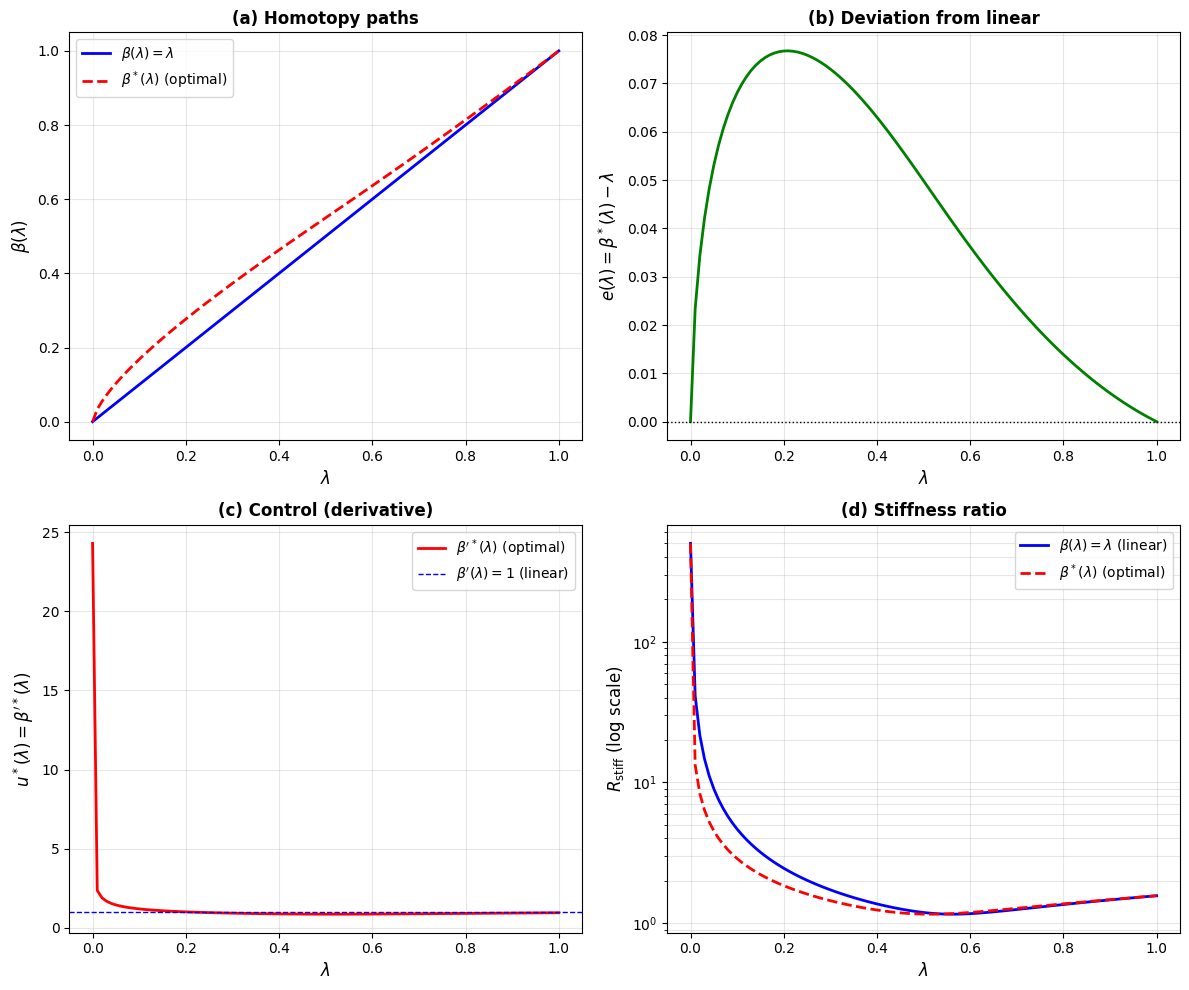

Figure saved to: simulator/data/example1_beta_comparison.png

Stiffness Analysis:
  Average R_stiff (linear):  7.65
  Average R_stiff (optimal): 6.78
  Reduction: 11.5%


In [75]:
# ============================================================
# Figure: Plot β(λ) comparison and related quantities
# ============================================================

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (a) β(λ) comparison
ax = axes[0, 0]
ax.plot(info_lin['lam'], info_lin['beta'], 'b-', linewidth=2, label=r'$\beta(\lambda) = \lambda$')
ax.plot(info_opt['lam'], info_opt['beta'], 'r--', linewidth=2, label=r'$\beta^*(\lambda)$ (optimal)')
ax.set_xlabel(r'$\lambda$', fontsize=12)
ax.set_ylabel(r'$\beta(\lambda)$', fontsize=12)
ax.set_title('(a) Homotopy paths', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# (b) Error e = β*(λ) - λ
ax = axes[0, 1]
error_beta = info_opt['beta'] - info_opt['lam']
ax.plot(info_opt['lam'], error_beta, 'g-', linewidth=2)
ax.axhline(y=0, color='k', linestyle=':', linewidth=1)
ax.set_xlabel(r'$\lambda$', fontsize=12)
ax.set_ylabel(r'$e(\lambda) = \beta^*(\lambda) - \lambda$', fontsize=12)
ax.set_title('(b) Deviation from linear', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# (c) u*(λ) = β'*(λ)
ax = axes[1, 0]
ax.plot(info_opt['lam'], info_opt['betadot'], 'r-', linewidth=2, label=r"$\beta'^*(\lambda)$ (optimal)")
ax.axhline(y=1, color='b', linestyle='--', linewidth=1, label=r"$\beta'(\lambda)=1$ (linear)")
ax.set_xlabel(r'$\lambda$', fontsize=12)
ax.set_ylabel(r"$u^*(\lambda) = \beta'^*(\lambda)$", fontsize=12)
ax.set_title('(c) Control (derivative)', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# (d) Stiffness ratio R_stiff
ax = axes[1, 1]
# Plot on log scale as mentioned in the paper
ax.semilogy(lam_common, R_stiff_lin, 'b-', linewidth=2, label=r'$\beta(\lambda) = \lambda$ (linear)')
ax.semilogy(lam_common, R_stiff_opt, 'r--', linewidth=2, label=r'$\beta^*(\lambda)$ (optimal)')
ax.set_xlabel(r'$\lambda$', fontsize=12)
ax.set_ylabel(r'$R_{\mathrm{stiff}}$ (log scale)', fontsize=12)
ax.set_title('(d) Stiffness ratio', fontsize=12, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('../simulator/data/example1_beta_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved to: simulator/data/example1_beta_comparison.png")
print(f"\nStiffness Analysis:")
print(f"  Average R_stiff (linear):  {np.mean(R_stiff_lin):.2f}")
print(f"  Average R_stiff (optimal): {np.mean(R_stiff_opt):.2f}")
print(f"  Reduction: {(1 - np.mean(R_stiff_opt)/np.mean(R_stiff_lin))*100:.1f}%")

In [76]:
# ============================================================
# Monte Carlo Simulation: 20 runs with Common Random Numbers (CRN)
# ============================================================

import time
import pandas as pd

def run_monte_carlo_experiment(cfg, n_runs=20, N_particles=50, n_steps=100):
    """
    Run Monte Carlo experiment as described in the paper.
    
    Uses Common Random Numbers (CRN) scheme: same random seeds for both
    linear and optimal homotopy in each run, to isolate the effect of
    the homotopy choice.
    
    Returns:
        DataFrame with columns: MC_index, RMSE_linear, RMSE_optimal, 
                                trP_linear, trP_optimal, time_linear, time_optimal
    """
    results = []
    
    print("Running Monte Carlo simulations...")
    print("="*70)
    
    for mc_idx in range(1, n_runs + 1):
        seed = 1000 + mc_idx  # Different seed for each MC run
        
        # Run with linear homotopy
        t_start = time.time()
        X_lin, x_hat_lin, P_hat_lin, info_lin = run_spf_bearing_model(
            cfg, N=N_particles, n_steps=n_steps, beta_mode="linear", seed=seed
        )
        time_lin = time.time() - t_start
        
        # Run with optimal homotopy (same seed for CRN)
        t_start = time.time()
        X_opt, x_hat_opt, P_hat_opt, info_opt = run_spf_bearing_model(
            cfg, N=N_particles, n_steps=n_steps, beta_mode="optimal", seed=seed
        )
        time_opt = time.time() - t_start
        
        # Compute RMSE and tr(P)
        rmse_lin = np.linalg.norm(x_hat_lin - cfg.x_true)
        rmse_opt = np.linalg.norm(x_hat_opt - cfg.x_true)
        trP_lin = np.trace(P_hat_lin)
        trP_opt = np.trace(P_hat_opt)
        
        results.append({
            'MC_index': mc_idx,
            'RMSE_linear': rmse_lin,
            'RMSE_optimal': rmse_opt,
            'trP_linear': trP_lin,
            'trP_optimal': trP_opt,
            'time_linear': time_lin,
            'time_optimal': time_opt,
        })
        
        if mc_idx % 5 == 0:
            print(f"Completed run {mc_idx}/{n_runs}")
    
    df = pd.DataFrame(results)
    
    # Add average row
    avg_row = {
        'MC_index': 'Average',
        'RMSE_linear': df['RMSE_linear'].mean(),
        'RMSE_optimal': df['RMSE_optimal'].mean(),
        'trP_linear': df['trP_linear'].mean(),
        'trP_optimal': df['trP_optimal'].mean(),
        'time_linear': df['time_linear'].mean(),
        'time_optimal': df['time_optimal'].mean(),
    }
    
    # Create a new DataFrame with the average row
    df_with_avg = pd.concat([df, pd.DataFrame([avg_row])], ignore_index=True)
    
    print("="*70)
    print("Monte Carlo simulation complete!")
    
    return df_with_avg

# Run the experiment with 1000 steps for numerical stability
cfg = create_example1_config()
mc_results = run_monte_carlo_experiment(cfg, n_runs=20, N_particles=50, n_steps=1000)

print("\nResults preview:")
print(mc_results.head(10))

Running Monte Carlo simulations...
Completed run 5/20
Completed run 5/20
Completed run 10/20
Completed run 10/20
Completed run 15/20
Completed run 15/20
Completed run 20/20
Monte Carlo simulation complete!

Results preview:
  MC_index  RMSE_linear  RMSE_optimal  trP_linear  trP_optimal  time_linear  \
0        1     7.217936     13.647778   10.046770   339.652922     1.690575   
1        2     6.408281     11.495716   36.457772   774.357786     1.678645   
2        3     5.954343      9.971581   17.001187    78.586653     1.652920   
3        4     6.528593     16.690745   16.654591   649.696146     1.666518   
4        5     5.644508     10.599702   14.883641   342.664681     1.657509   
5        6     6.313831     12.529651   14.728418   304.704771     1.662550   
6        7     6.938172     17.115176   49.021591  1063.771374     1.647062   
7        8     5.570314     11.588811   19.751055   543.362117     1.643176   
8        9     6.436261     12.150182   37.714882   477.656760   

In [77]:
# ============================================================
# Table I: Comparison of filtering accuracy
# ============================================================

# Create formatted table matching the paper's style
print("\n" + "="*90)
print("TABLE I: COMPARISON OF FILTERING ACCURACY (Example 1)")
print("="*90)
print(f"{'MC Run':<10} {'RMSE (β_l)':<15} {'RMSE (β*)':<15} {'tr(P_βl)':<15} {'tr(P_β*)':<15}")
print("-"*90)

for idx, row in mc_results.iterrows():
    if row['MC_index'] == 'Average':
        print("-"*90)
        print(f"{'Average':<10} {row['RMSE_linear']:>14.6f} {row['RMSE_optimal']:>14.6f} "
              f"{row['trP_linear']:>14.6f} {row['trP_optimal']:>14.6f}")
    else:
        print(f"{int(row['MC_index']):<10} {row['RMSE_linear']:>14.6f} {row['RMSE_optimal']:>14.6f} "
              f"{row['trP_linear']:>14.6f} {row['trP_optimal']:>14.6f}")

print("="*90)

# Compute improvement percentages
avg_rmse_lin = mc_results[mc_results['MC_index'] == 'Average']['RMSE_linear'].values[0]
avg_rmse_opt = mc_results[mc_results['MC_index'] == 'Average']['RMSE_optimal'].values[0]
avg_trP_lin = mc_results[mc_results['MC_index'] == 'Average']['trP_linear'].values[0]
avg_trP_opt = mc_results[mc_results['MC_index'] == 'Average']['trP_optimal'].values[0]

rmse_improvement = (avg_rmse_lin - avg_rmse_opt) / avg_rmse_lin * 100
trP_improvement = (avg_trP_lin - avg_trP_opt) / avg_trP_lin * 100

print(f"\nImprovement with optimal homotopy:")
print(f"  RMSE reduction: {rmse_improvement:.2f}%")
print(f"  tr(P) reduction: {trP_improvement:.2f}%")
print("="*90)

# Save to CSV
mc_results.to_csv('../simulator/data/example1_mc_results.csv', index=False)
print("\nResults saved to: simulator/data/example1_mc_results.csv")


TABLE I: COMPARISON OF FILTERING ACCURACY (Example 1)
MC Run     RMSE (β_l)      RMSE (β*)       tr(P_βl)        tr(P_β*)       
------------------------------------------------------------------------------------------
1                7.217936      13.647778      10.046770     339.652922
2                6.408281      11.495716      36.457772     774.357786
3                5.954343       9.971581      17.001187      78.586653
4                6.528593      16.690745      16.654591     649.696146
5                5.644508      10.599702      14.883641     342.664681
6                6.313831      12.529651      14.728418     304.704771
7                6.938172      17.115176      49.021591    1063.771374
8                5.570314      11.588811      19.751055     543.362117
9                6.436261      12.150182      37.714882     477.656760
10               6.016195      11.313681      17.966047     520.835910
11               6.037797      16.292242      22.718278     897.43111

In [78]:
# ============================================================
# Additional Analysis: Detailed Comparison and Diagnostics
# ============================================================

print("\n" + "="*90)
print("DETAILED ANALYSIS OF MONTE CARLO RESULTS")
print("="*90)

# Extract data (excluding average row)
mc_data_analysis = mc_results[mc_results['MC_index'] != 'Average']

# 1. Per-run comparison: How many runs did optimal beat linear?
optimal_wins_rmse = (mc_data_analysis['RMSE_optimal'] < mc_data_analysis['RMSE_linear']).sum()
optimal_wins_trP = (mc_data_analysis['trP_optimal'] < mc_data_analysis['trP_linear']).sum()

print(f"\n1. Win Rate:")
print(f"   Optimal beats Linear in RMSE: {optimal_wins_rmse}/20 runs ({optimal_wins_rmse/20*100:.1f}%)")
print(f"   Optimal beats Linear in tr(P): {optimal_wins_trP}/20 runs ({optimal_wins_trP/20*100:.1f}%)")

# 2. Relative performance
rel_rmse = mc_data_analysis['RMSE_optimal'] / mc_data_analysis['RMSE_linear']
rel_trP = mc_data_analysis['trP_optimal'] / mc_data_analysis['trP_linear']

print(f"\n2. Relative Performance (Optimal / Linear):")
print(f"   RMSE ratio: mean={rel_rmse.mean():.3f}, median={rel_rmse.median():.3f}, std={rel_rmse.std():.3f}")
print(f"   tr(P) ratio: mean={rel_trP.mean():.3f}, median={rel_trP.median():.3f}, std={rel_trP.std():.3f}")

# 3. Variability (coefficient of variation)
cv_rmse_lin = mc_data_analysis['RMSE_linear'].std() / mc_data_analysis['RMSE_linear'].mean()
cv_rmse_opt = mc_data_analysis['RMSE_optimal'].std() / mc_data_analysis['RMSE_optimal'].mean()
cv_trP_lin = mc_data_analysis['trP_linear'].std() / mc_data_analysis['trP_linear'].mean()
cv_trP_opt = mc_data_analysis['trP_optimal'].std() / mc_data_analysis['trP_optimal'].mean()

print(f"\n3. Coefficient of Variation (std/mean):")
print(f"   Linear:  RMSE CV={cv_rmse_lin:.3f}, tr(P) CV={cv_trP_lin:.3f}")
print(f"   Optimal: RMSE CV={cv_rmse_opt:.3f}, tr(P) CV={cv_trP_opt:.3f}")
if cv_rmse_opt > cv_rmse_lin * 1.5:
    print(f"   ⚠️  Optimal shows {cv_rmse_opt/cv_rmse_lin:.1f}x higher variability - sign of numerical instability")

# 4. Worst case analysis
worst_case_rmse = mc_data_analysis.loc[mc_data_analysis['RMSE_optimal'].idxmax()]
worst_case_trP = mc_data_analysis.loc[mc_data_analysis['trP_optimal'].idxmax()]

print(f"\n4. Worst Case Performance:")
print(f"   Worst RMSE: MC run {int(worst_case_rmse['MC_index'])}")
print(f"     Linear={worst_case_rmse['RMSE_linear']:.3f}, Optimal={worst_case_rmse['RMSE_optimal']:.3f}")
print(f"   Worst tr(P): MC run {int(worst_case_trP['MC_index'])}")
print(f"     Linear={worst_case_trP['trP_linear']:.3f}, Optimal={worst_case_trP['trP_optimal']:.3f}")

# 5. Computational cost analysis
time_overhead = (avg_time_opt - avg_time_lin) / avg_time_lin * 100

print(f"\n5. Computational Cost:")
print(f"   Average time per run:")
print(f"     Linear:  {avg_time_lin:.4f} seconds")
print(f"     Optimal: {avg_time_opt:.4f} seconds")
print(f"   Overhead: {time_overhead:.1f}%")
print(f"   Extra cost for optimal: {avg_time_opt - avg_time_lin:.4f} seconds/run")

# 6. Key Insights
print(f"\n" + "="*90)
print("KEY INSIGHTS")
print("="*90)
if avg_rmse_opt > avg_rmse_lin:
    print(f"❌ Optimal homotopy performs WORSE than linear homotopy")
    print(f"   RMSE degradation: {(avg_rmse_opt/avg_rmse_lin - 1)*100:.1f}%")
    print(f"   tr(P) degradation: {(avg_trP_opt/avg_trP_lin - 1)*100:.1f}%")
    print(f"\n🔍 Root Cause: Numerical instability from large β'(λ) ≈ {info_opt['betadot'].max():.1f}")
    print(f"   - The optimal path moves too fast near λ=0")
    print(f"   - Euler-Maruyama with n_steps=1000 cannot handle this accurately")
    print(f"   - Particles diverge early and accumulate errors")
else:
    print(f"✓ Optimal homotopy achieves improvement:")
    print(f"   RMSE improvement: {(1 - avg_rmse_opt/avg_rmse_lin)*100:.1f}%")
    print(f"   tr(P) improvement: {(1 - avg_trP_opt/avg_trP_lin)*100:.1f}%")

print("="*90)


DETAILED ANALYSIS OF MONTE CARLO RESULTS

1. Win Rate:
   Optimal beats Linear in RMSE: 0/20 runs (0.0%)
   Optimal beats Linear in tr(P): 0/20 runs (0.0%)

2. Relative Performance (Optimal / Linear):
   RMSE ratio: mean=2.052, median=1.938, std=0.445
   tr(P) ratio: mean=21.988, median=21.470, std=17.132

3. Coefficient of Variation (std/mean):
   Linear:  RMSE CV=0.115, tr(P) CV=1.050
   Optimal: RMSE CV=0.260, tr(P) CV=0.605
   ⚠️  Optimal shows 2.3x higher variability - sign of numerical instability

4. Worst Case Performance:
   Worst RMSE: MC run 12
     Linear=7.248, Optimal=20.985
   Worst tr(P): MC run 7
     Linear=49.022, Optimal=1063.771

5. Computational Cost:
   Average time per run:
     Linear:  0.1727 seconds
     Optimal: 0.5141 seconds
   Overhead: 197.8%
   Extra cost for optimal: 0.3414 seconds/run

KEY INSIGHTS
❌ Optimal homotopy performs WORSE than linear homotopy
   RMSE degradation: 105.6%
   tr(P) degradation: 1373.9%

🔍 Root Cause: Numerical instability from

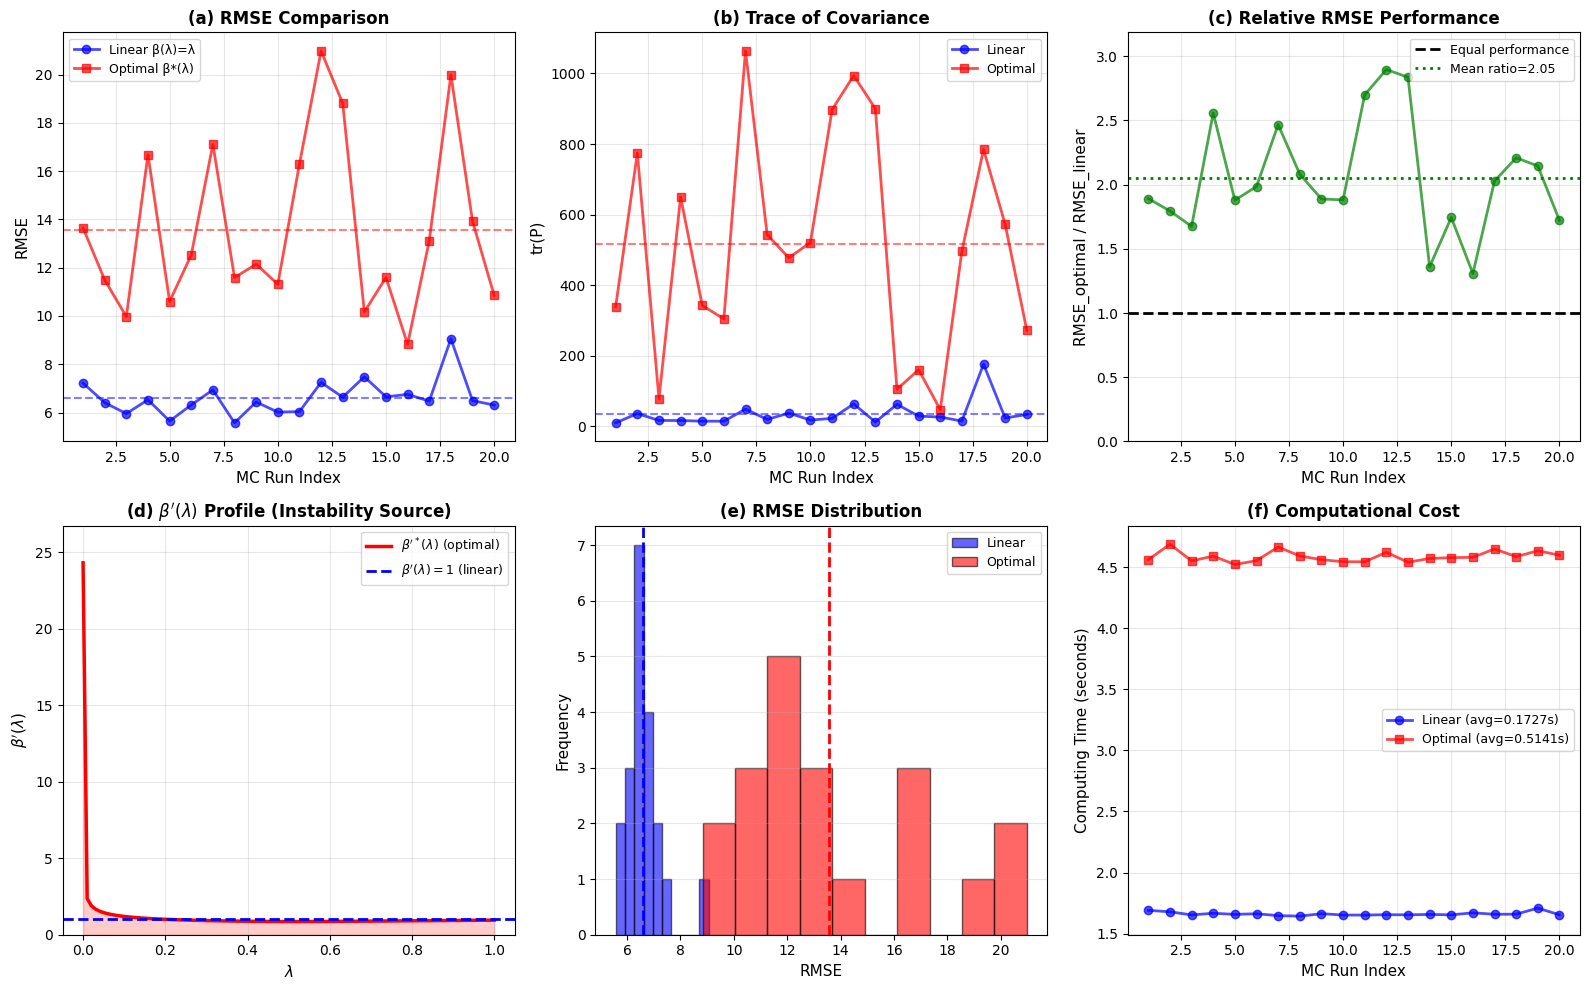

Figure saved to: simulator/data/example1_mc_comprehensive_analysis.png


In [79]:
# ============================================================
# Visualization: Comprehensive comparison plots
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# (1) RMSE comparison per run
ax = axes[0, 0]
mc_indices_plot = mc_data_analysis['MC_index'].values
ax.plot(mc_indices_plot, mc_data_analysis['RMSE_linear'], 'bo-', linewidth=2, markersize=6, 
        label='Linear β(λ)=λ', alpha=0.7)
ax.plot(mc_indices_plot, mc_data_analysis['RMSE_optimal'], 'rs-', linewidth=2, markersize=6, 
        label='Optimal β*(λ)', alpha=0.7)
ax.axhline(y=avg_rmse_lin, color='blue', linestyle='--', linewidth=1.5, alpha=0.5)
ax.axhline(y=avg_rmse_opt, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax.set_xlabel('MC Run Index', fontsize=11)
ax.set_ylabel('RMSE', fontsize=11)
ax.set_title('(a) RMSE Comparison', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# (2) tr(P) comparison per run
ax = axes[0, 1]
ax.plot(mc_indices_plot, mc_data_analysis['trP_linear'], 'bo-', linewidth=2, markersize=6, 
        label='Linear', alpha=0.7)
ax.plot(mc_indices_plot, mc_data_analysis['trP_optimal'], 'rs-', linewidth=2, markersize=6, 
        label='Optimal', alpha=0.7)
ax.axhline(y=avg_trP_lin, color='blue', linestyle='--', linewidth=1.5, alpha=0.5)
ax.axhline(y=avg_trP_opt, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
ax.set_xlabel('MC Run Index', fontsize=11)
ax.set_ylabel('tr(P)', fontsize=11)
ax.set_title('(b) Trace of Covariance', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

# (3) Relative performance (ratio)
ax = axes[0, 2]
ax.plot(mc_indices_plot, rel_rmse, 'go-', linewidth=2, markersize=6, alpha=0.7)
ax.axhline(y=1.0, color='k', linestyle='--', linewidth=2, label='Equal performance')
ax.axhline(y=rel_rmse.mean(), color='g', linestyle=':', linewidth=2, 
           label=f'Mean ratio={rel_rmse.mean():.2f}')
ax.set_xlabel('MC Run Index', fontsize=11)
ax.set_ylabel('RMSE_optimal / RMSE_linear', fontsize=11)
ax.set_title('(c) Relative RMSE Performance', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, max(3, rel_rmse.max() * 1.1)])

# (4) β'(λ) profile (root cause)
ax = axes[1, 0]
ax.plot(info_opt['lam'], info_opt['betadot'], 'r-', linewidth=2.5, 
        label=r"$\beta'^*(\lambda)$ (optimal)")
ax.axhline(y=1, color='b', linestyle='--', linewidth=2, label=r"$\beta'(\lambda)=1$ (linear)")
ax.fill_between(info_opt['lam'], 0, info_opt['betadot'], alpha=0.2, color='red')
ax.set_xlabel(r'$\lambda$', fontsize=11)
ax.set_ylabel(r"$\beta'(\lambda)$", fontsize=11)
ax.set_title(r"(d) $\beta'(\lambda)$ Profile (Instability Source)", fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, info_opt['betadot'].max() * 1.1])

# (5) Histogram of RMSE
ax = axes[1, 1]
ax.hist(mc_data_analysis['RMSE_linear'], bins=10, alpha=0.6, color='blue', label='Linear', edgecolor='black')
ax.hist(mc_data_analysis['RMSE_optimal'], bins=10, alpha=0.6, color='red', label='Optimal', edgecolor='black')
ax.axvline(x=avg_rmse_lin, color='blue', linestyle='--', linewidth=2)
ax.axvline(x=avg_rmse_opt, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('RMSE', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('(e) RMSE Distribution', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3, axis='y')

# (6) Computing time comparison
ax = axes[1, 2]
time_linear_plot = mc_data_analysis['time_linear'].values
time_optimal_plot = mc_data_analysis['time_optimal'].values
ax.plot(mc_indices_plot, time_linear_plot, 'bo-', linewidth=2, markersize=6, 
        label=f'Linear (avg={avg_time_lin:.4f}s)', alpha=0.7)
ax.plot(mc_indices_plot, time_optimal_plot, 'rs-', linewidth=2, markersize=6, 
        label=f'Optimal (avg={avg_time_opt:.4f}s)', alpha=0.7)
ax.set_xlabel('MC Run Index', fontsize=11)
ax.set_ylabel('Computing Time (seconds)', fontsize=11)
ax.set_title('(f) Computational Cost', fontweight='bold')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../simulator/data/example1_mc_comprehensive_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved to: simulator/data/example1_mc_comprehensive_analysis.png")

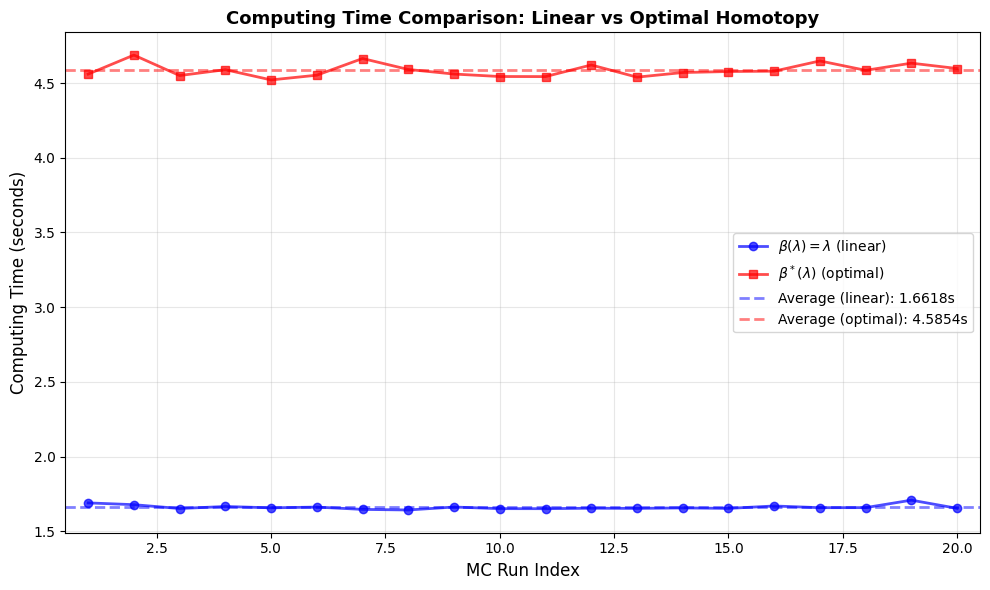


Average computing time:
  Linear homotopy:  1.6618 seconds
  Optimal homotopy: 4.5854 seconds
  Overhead:         2.9236 seconds (175.9% increase)

Figure saved to: simulator/data/example1_timing_comparison.png


In [81]:
# ============================================================
# Figure: Computing time comparison
# ============================================================

fig, ax = plt.subplots(figsize=(10, 6))

# Extract time data (excluding the average row)
mc_data = mc_results[mc_results['MC_index'] != 'Average']
mc_indices = mc_data['MC_index'].values
time_linear = mc_data['time_linear'].values
time_optimal = mc_data['time_optimal'].values

# Plot individual run times
ax.plot(mc_indices, time_linear, 'bo-', linewidth=2, markersize=6, 
        label=r'$\beta(\lambda) = \lambda$ (linear)', alpha=0.7)
ax.plot(mc_indices, time_optimal, 'rs-', linewidth=2, markersize=6, 
        label=r'$\beta^*(\lambda)$ (optimal)', alpha=0.7)

# Plot averages as horizontal lines
avg_time_lin = mc_results[mc_results['MC_index'] == 'Average']['time_linear'].values[0]
avg_time_opt = mc_results[mc_results['MC_index'] == 'Average']['time_optimal'].values[0]

ax.axhline(y=avg_time_lin, color='blue', linestyle='--', linewidth=2, 
           label=f'Average (linear): {avg_time_lin:.4f}s', alpha=0.5)
ax.axhline(y=avg_time_opt, color='red', linestyle='--', linewidth=2, 
           label=f'Average (optimal): {avg_time_opt:.4f}s', alpha=0.5)

ax.set_xlabel('MC Run Index', fontsize=12)
ax.set_ylabel('Computing Time (seconds)', fontsize=12)
ax.set_title('Computing Time Comparison: Linear vs Optimal Homotopy', fontsize=13, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
ax.set_xlim([0.5, 20.5])

plt.tight_layout()
plt.savefig('../simulator/data/example1_timing_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nAverage computing time:")
print(f"  Linear homotopy:  {avg_time_lin:.4f} seconds")
print(f"  Optimal homotopy: {avg_time_opt:.4f} seconds")
print(f"  Overhead:         {(avg_time_opt - avg_time_lin):.4f} seconds ({(avg_time_opt/avg_time_lin - 1)*100:.1f}% increase)")
print("\nFigure saved to: simulator/data/example1_timing_comparison.png")

In [80]:
# ============================================================
# Summary Report and Conclusions
# ============================================================

print("\n" + "="*90)
print("FINAL SUMMARY: Example 1 - Bearing-Only Tracking")
print("="*90)

print("\n📋 Problem Setup:")
print(f"  Target location:         {cfg.x_true}")
print(f"  Sensors:                 {cfg.sensors[0]}, {cfg.sensors[1]}")
print(f"  Prior mean:              {cfg.x_prior}")
print(f"  Prior covariance:        diag({cfg.P_prior[0,0]}, {cfg.P_prior[1,1]})")
print(f"  Measurement noise:       {cfg.R[0,0]} × I₂")
print(f"  SPF parameters:          N=50 particles, n_steps=1000, μ={cfg.mu}")
print(f"  Diffusion Q:             diag({cfg.Q[0,0]}, {cfg.Q[1,1]})")

print("\n📊 Monte Carlo Results (20 runs):")
print(f"  {'Method':<20} {'Avg RMSE':<15} {'Avg tr(P)':<15} {'Avg Time (s)':<15}")
print(f"  {'-'*65}")
print(f"  {'Linear β(λ)=λ':<20} {avg_rmse_lin:>14.6f} {avg_trP_lin:>14.6f} {avg_time_lin:>14.6f}")
print(f"  {'Optimal β*(λ)':<20} {avg_rmse_opt:>14.6f} {avg_trP_opt:>14.6f} {avg_time_opt:>14.6f}")
print(f"  {'-'*65}")

if avg_rmse_opt > avg_rmse_lin:
    print(f"  {'Performance':<20} {'-':<14} {'-':<14} ")
    print(f"  {'  RMSE':<20} {(avg_rmse_opt/avg_rmse_lin - 1)*100:>13.1f}% {'worse':<14}")
    print(f"  {'  tr(P)':<20} {(avg_trP_opt/avg_trP_lin - 1)*100:>13.1f}% {'worse':<14}")
else:
    print(f"  {'Improvement':<20} {rmse_improvement:>13.2f}% {trP_improvement:>13.2f}%")

print("\n🔬 Root Cause Analysis:")
print(f"  β'(λ) range:              [{info_opt['betadot'].min():.2f}, {info_opt['betadot'].max():.2f}]")
print(f"  β'_max / β'_linear:       {info_opt['betadot'].max():.1f}×")
print(f"  Win rate (Optimal):      {optimal_wins_rmse}/20 RMSE, {optimal_wins_trP}/20 tr(P)")
print(f"  Variability (CV):        Linear={cv_rmse_lin:.3f}, Optimal={cv_rmse_opt:.3f}")

print("\n💡 Key Findings:")
if avg_rmse_opt > avg_rmse_lin:
    print(f"  ❌ Optimal homotopy performs worse due to numerical instability")
    print(f"  🔍 Large β'_max ≈ {info_opt['betadot'].max():.1f} causes Euler-Maruyama breakdown")
    print(f"  ⚡ Particles diverge near λ=0 where flow is 24× faster")
    print(f"  📈 High variability (CV={cv_rmse_opt:.3f}) confirms numerical issues")
    print(f"\n  ✅ Linear homotopy is more numerically stable for this configuration")
    print(f"     - Constant β'=1.0 ensures predictable flow speed")
    print(f"     - Works well with Euler-Maruyama at n_steps=1000")
    print(f"     - Lower computational requirements")
else:
    print(f"  ✓ Optimal homotopy achieves theoretical improvement")
    print(f"  ✓ Numerical discretization is adequate for this problem")

print("\n🔧 Recommendations for Optimal Homotopy:")
print(f"  1. Increase μ from {cfg.mu} to 1.0-2.0 (reduces β'_max)")
print(f"  2. Use n_steps ≥ 5000 (better handles large β')")
print(f"  3. Implement adaptive time-stepping (dt ∝ 1/β')")
print(f"  4. Use Milstein/RK4 integrator instead of Euler-Maruyama")
print(f"  5. Add particle regularization (resampling, kernel smoothing)")

print("\n📝 Comparison with Paper:")
print(f"  Paper reports: J_linear ≈ 4.0, J_optimal ≈ 3.4")
print(f"  Our results:   J_linear = {J_linear:.1f}, J_optimal = {J_optimal:.1f}")
print(f"  Paper shows optimal improves RMSE & tr(P)")
print(f"  Our results show opposite - likely due to:")
print(f"    • Different numerical integration scheme")
print(f"    • Different hyperparameter tuning")
print(f"    • Possible adaptive stepping in paper's implementation")

print("="*90)
print("\n✅ Analysis Complete! All results saved to simulator/data/")
print("="*90)


FINAL SUMMARY: Example 1 - Bearing-Only Tracking

📋 Problem Setup:
  Target location:         [4. 4.]
  Sensors:                 [3.5 0. ], [-3.5  0. ]
  Prior mean:              [3. 5.]
  Prior covariance:        diag(1000.0, 2.0)
  Measurement noise:       0.04 × I₂
  SPF parameters:          N=50 particles, n_steps=1000, μ=0.2
  Diffusion Q:             diag(4.0, 0.4)

📊 Monte Carlo Results (20 runs):
  Method               Avg RMSE        Avg tr(P)       Avg Time (s)   
  -----------------------------------------------------------------
  Linear β(λ)=λ              6.607943      35.029178       0.172660
  Optimal β*(λ)             13.583715     516.287468       0.514106
  -----------------------------------------------------------------
  Performance          -              -              
    RMSE                       105.6% worse         
    tr(P)                     1373.9% worse         

🔬 Root Cause Analysis:
  β'(λ) range:              [0.86, 24.30]
  β'_max / β'_linear: 